# Wine quality analysis with decision trees

The file `wine_quality.csv` contains information about chemical properties of some wines. Let's see if what we learned so far can help us to predict if a wine will be good based on its properties.

## Load, examine, clean, prepare

In [1]:
# Read and parse the wine_quality.csv file.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'wine_quality.csv'

df = pd.read_csv(file_path)

df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [2]:
# How many rows and columns does the dataset have ?

num_columns = df.shape[1]
num_rows = len(df)

print(f"The DataFrame contains {num_rows} rows and {num_columns} columns.")

The DataFrame contains 6497 rows and 13 columns.


In [3]:
# List all chemical properties of this dataset.

column_names = df.columns
print("List of all chemical properties", column_names)

List of all chemical properties Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


In [4]:
# What kind of wines are present in this dataset ?

print("Kind of wines :", df["type"].unique())

Kind of wines : ['white' 'red']


In [5]:
# Find the right method to get the average/minimum/maximum value
# of each column (and only these 3 information per column)

df.iloc[:, 1:].agg(['mean', 'min', 'max'])

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
mean       7.216579          0.339691     0.318722        5.444326   0.056042   
min        3.800000          0.080000     0.000000        0.600000   0.009000   
max       15.900000          1.580000     1.660000       65.800000   0.611000   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
mean            30.525319            115.744574  0.994697  3.218395   
min              1.000000              6.000000  0.987110  2.720000   
max            289.000000            440.000000  1.038980  4.010000   

      sulphates    alcohol   quality  
mean   0.531215  10.491801  5.818378  
min    0.220000   8.000000  3.000000  
max    2.000000  14.900000  9.000000

In [6]:
# Does this dataset have any missing information ?
# How many missing values ?
# Which column has the most missing values ?

nan_values = df.isna()
print("Number of missing values", df.isna().sum().sum())
print("The column with the most missing values :", df.isna().sum().idxmax())

Number of missing values 38
The column with the most missing values : fixed acidity


In [7]:
# Remove the rows which have at least 1 missing value.
# How many rows have been removed ?

df_cleaned = df.dropna()

print("Number of rows removed :", len(df) - len(df_cleaned))

Number of rows removed : 34


<AxesSubplot:>

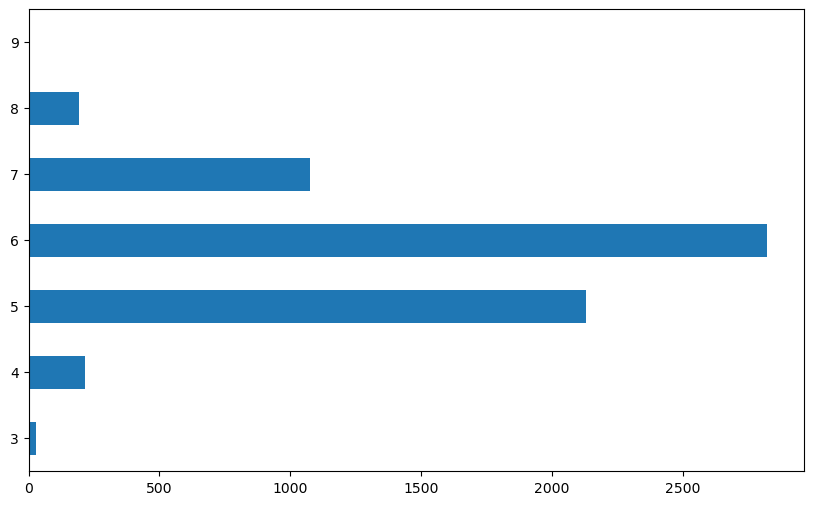

In [8]:
# Use an histogram to see the repartition of
# the wine quality.

quality = df_cleaned["quality"].value_counts().sort_index()

quality.plot(kind='barh', figsize=(10, 6))

In [9]:
# Let's consider that a wine is good if its quality is
# at least 7. Replace the values in the "quality" column
# with "good" if quality >= 7 and with "not good" otherwise.

df_cleaned.loc[df_cleaned['quality'] >= 7, 'quality'] = "good"
df_cleaned.loc[df_cleaned['quality'] != "good", 'quality'] = "not good"

df_cleaned

C:\Users\HP\AppData\Local\Temp\ipykernel_5672\3422327499.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[df_cleaned['quality'] >= 7, 'quality'] = "good"


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol   quality  
0          0.45      8.8  not good  
1          0.49      9.5  not good  
2          0.44     10.1  not good  
3          0.40      9.9  not good  
4          0.40      9.9  not good  
...         ...      ...       ...  
6491       0.82      9.5  not good  
6492       0.58     10.5  not good  
6494       0.75     11.0  not good  
6495       0.71     10.2  not good  
6496       0.66     11.0  not good  

[6463 rows x 13 columns]

In [10]:
# Create the input data (i.e. the properties) and the
# label (i.e. the quality of wine) and assign them
# to 2 different variables X and y. Our machine learning
# algorithm needs to have both input and output data.

X = df_cleaned.drop(columns=['quality'])  

y = df_cleaned['quality']

In [11]:
# Separate your data into a training and a test set
# with 80% for the training set.

np.random.seed(0)

num_samples = len(X)

num_train_samples = int(0.8 * num_samples)
num_test_samples = num_samples - num_train_samples

indices = np.random.permutation(num_samples)

X_train, X_test = X.iloc[indices[:num_train_samples]], X.iloc[indices[num_train_samples:]]
y_train, y_test = y.iloc[indices[:num_train_samples]], y.iloc[indices[num_train_samples:]]

## Predicting wine quality with a decision tree

In [12]:
# Is this a classification or a regression problem ?
# Import the appropriate version of DecisionTree, then
# train it with your training data.

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

ValueError: could not convert string to float: 'white'

In [13]:
# Oops, it seems that there is a problem! Indeed, most
# machine learning algorithms only work with numerical vectors.
# And our current training data still have some string values
# (like the type or the quality). We need to transform them before
# training our model.

# sklearn comes with tools to transform non-numerical values.
# In our case, we are going to use a LabelEncoder. Look at the
# documentation to learn what is does.

from sklearn.preprocessing import LabelEncoder

# now create two encoders: one for the `type` in X, the other
# for the `quality` in y. Use the trained encoders to transform
# X_train, X_test, y_train and y_test.

type_encoder = LabelEncoder()
quality_encoder = LabelEncoder()

X_train['type'] = type_encoder.fit_transform(X_train['type'])
X_test['type'] = type_encoder.fit_transform(X_test['type'])

y_train = quality_encoder.fit_transform(y_train)
y_test = quality_encoder.fit_transform(y_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_5672\2718214476.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['type'] = type_encoder.fit_transform(X_train['type'])
C:\Users\HP\AppData\Local\Temp\ipykernel_5672\2718214476.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['type'] = type_encoder.fit_transform(X_test['type'])


In [14]:
# Now train again your Decision Tree.

from sklearn.tree import plot_tree

tree.fit(X_train, y_train)

class_names = [str(cls) for cls in quality_encoder2.classes_]
plt.figure(figsize=(20, 20))
plot_tree(tree, feature_names=X_test.columns, class_names=class_names, filled=True)

plt.show()

NameError: name 'quality_encoder2' is not defined

In [15]:
# What is the accuracy of your model (both on training
# and test sets) ? Do you think we are underfitting ? Overfitting ?

from sklearn.metrics import accuracy_score

y_train_pred = tree.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Traim Accuracy: {training_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("I think, there is a overfitting")

Traim Accuracy: 1.00
Test Accuracy: 0.86
I think, there is a overfitting


In [ ]:
# Look at the documentation of your DecisionTree model
# and try to tune the hyperparameters: create other models
# with different values for max_depth, min_samples_split, max_features...
# Train them and evaluate their accuracy. What is the best accuracy
# you obtain?

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth_values = [None, 10, 20, 30]
min_samples_split_values = [2, 5, 10]
max_features_values = [None, 'auto', 'sqrt', 'log2']

best_accuracy = 0.0
best_model = None

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for max_features in max_features_values:
            tree = DecisionTreeClassifier()
            
            tree.fit(X_train, y_train)
            
            y_test_pred = tree.predict(X_test)
            
            accuracy = accuracy_score(y_test, y_test_pred)
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = tree

print(f"Best Hyperparameters: max_depth={best_model.max_depth}, min_samples_split={best_model.min_samples_split}, max_features={best_model.max_features}")
print(f"Best Accuracy: {best_accuracy:.2f}")


In [ ]:
# Use the feature_importances_ attribute of your best model. What are
# the three most important features to evaluate the quality of a wine?

feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_features = importance_df.head(3)

print("Top three most important features:", top_features)

## Predicting wine quality with random forests

We saw in the course (and in this example) that Decision Trees can easily overfit. To prevent this, we can use Random forests instead. Random forests are a collection of decision trees, where each decision tree is trained differently. The prediction of the RandomForest is then the average (or the most frequent) prediction of all the decision trees.

In [ ]:
# Use a RandomForest composed of 20 decision trees and
# train it on your data. Evaluate its accuracy. Do you see
# an improvement ?
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=20, random_state=0)
forest.fit(X_train, y_train)
y_test_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the Random Forest: {accuracy:.2f}")


In [ ]:
# Train other random forest classifiers with different
# hyperparameters (n_estimators, max_features). Can you beat
# the best accuracy you obtained with a single decision tree ?

n_estimators_values = [10, 50, 100, 200]
max_features_values = [None, 'sqrt', 'log2']

best_accuracy = 0.0
best_model = None

for n_estimators in n_estimators_values:
    for max_features in max_features_values:
        forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=0)
        forest.fit(X_train, y_train)
        y_test_pred = forest.predict(X_test)
        accuracy = accuracy_score(y_test, y_test_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = forest

print(f"Best Hyperparameters: n_estimators={best_model.n_estimators}, max_features={best_model.max_features}")
print(f"Best Accuracy: {best_accuracy:.2f}")
